In [97]:
# Write your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [98]:
path = 'data/data.csv'
# data  is not encoded in utf-8, so we need to specify the encoding
df = pd.read_csv(path, encoding="latin1")
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [99]:
def standardize_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df
df = standardize_column_names(df)

In [100]:
def get_columns_data_types(df):
    numeric_columns = []
    categorical_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':
            categorical_columns.append(column)
        else:
            numeric_columns.append(column)
                                   
    return numeric_columns, categorical_columns
numeric_columns, categorical_columns = get_columns_data_types(df)
print(f'numeric_columns: {numeric_columns} \n categorical_columns: {categorical_columns}')

numeric_columns: ['track_score', 'spotify_popularity', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count', 'tidal_popularity', 'explicit_track'] 
 categorical_columns: ['track', 'album_name', 'artist', 'release_date', 'isrc', 'all_time_rank', 'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach', 'youtube_views', 'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach', 'airplay_spins', 'siriusxm_spins', 'deezer_playlist_reach', 'pandora_streams', 'pandora_track_stations', 'soundcloud_streams', 'shazam_counts']


In [101]:
def get_non_value_info(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values_percentage = missing_values / len(df) * 100
    return missing_values, missing_values_percentage

missing_values, missing_values_percentage = get_non_value_info(df)
print(f'missing_values: {missing_values} \n missing_values_percentage: {missing_values_percentage}')

missing_values: artist                           5
spotify_streams                113
spotify_playlist_count          70
spotify_playlist_reach          72
spotify_popularity             804
youtube_views                  308
youtube_likes                  315
tiktok_posts                  1173
tiktok_likes                   980
tiktok_views                   981
youtube_playlist_reach        1009
apple_music_playlist_count     561
airplay_spins                  498
siriusxm_spins                2123
deezer_playlist_count          921
deezer_playlist_reach          928
amazon_playlist_count         1055
pandora_streams               1106
pandora_track_stations        1268
soundcloud_streams            3333
shazam_counts                  577
tidal_popularity              4600
dtype: int64 
 missing_values_percentage: artist                          0.108696
spotify_streams                 2.456522
spotify_playlist_count          1.521739
spotify_playlist_reach          1.565217
spotify_

In [102]:
def drop_columns_with_missing_values(df, missing_values_percentage, threshold):
    columns_to_drop = missing_values_percentage[missing_values_percentage > threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

df = drop_columns_with_missing_values(df, missing_values_percentage, 50)
missing_values, missing_values_percentage = get_non_value_info(df)
print(f'missing_values: {missing_values} \n missing_values_percentage: {missing_values_percentage}')

missing_values: artist                           5
spotify_streams                113
spotify_playlist_count          70
spotify_playlist_reach          72
spotify_popularity             804
youtube_views                  308
youtube_likes                  315
tiktok_posts                  1173
tiktok_likes                   980
tiktok_views                   981
youtube_playlist_reach        1009
apple_music_playlist_count     561
airplay_spins                  498
siriusxm_spins                2123
deezer_playlist_count          921
deezer_playlist_reach          928
amazon_playlist_count         1055
pandora_streams               1106
pandora_track_stations        1268
shazam_counts                  577
dtype: int64 
 missing_values_percentage: artist                         0.108696
spotify_streams                2.456522
spotify_playlist_count         1.521739
spotify_playlist_reach         1.565217
spotify_popularity            17.478261
youtube_views                  6.695652
yo

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

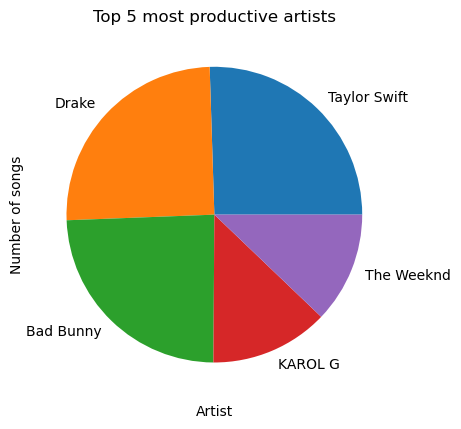

In [112]:
#create pie chart for the top 5 most productive artists
df = df.dropna(subset=['artist', 'spotify_streams'])
top_artists = df['artist'].value_counts().head(5)
top_artists.plot(kind='pie')
plt.title('Top 5 most productive artists')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.show()

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

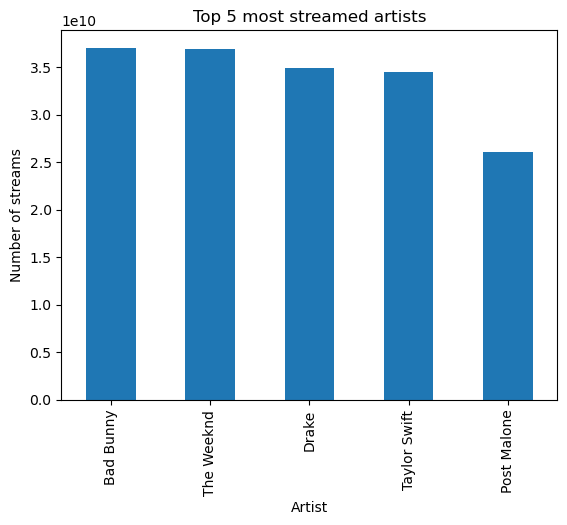

In [113]:
# create a bar chart for the top 5 most streamed artists
df = df.dropna(subset=['artist', 'spotify_streams'])
df['spotify_streams'] = df['spotify_streams'].astype(str).str.replace(',', '', regex=True)
df['spotify_streams'] = pd.to_numeric(df['spotify_streams'], errors='coerce')
top_streamed_artists = df.groupby('artist')['spotify_streams'].sum().nlargest(5)
top_streamed_artists.plot(kind='bar')
plt.title('Top 5 most streamed artists')
plt.xlabel('Artist')
plt.ylabel('Number of streams')
plt.show()

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

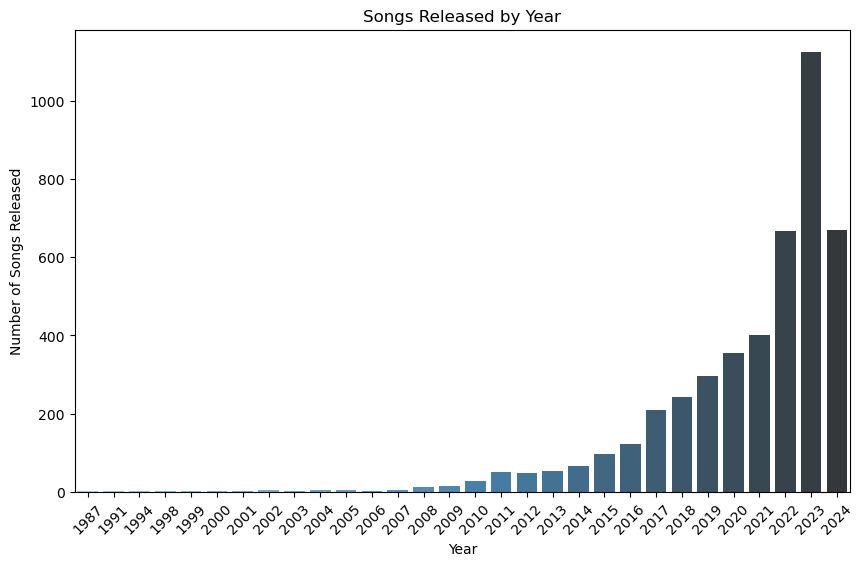

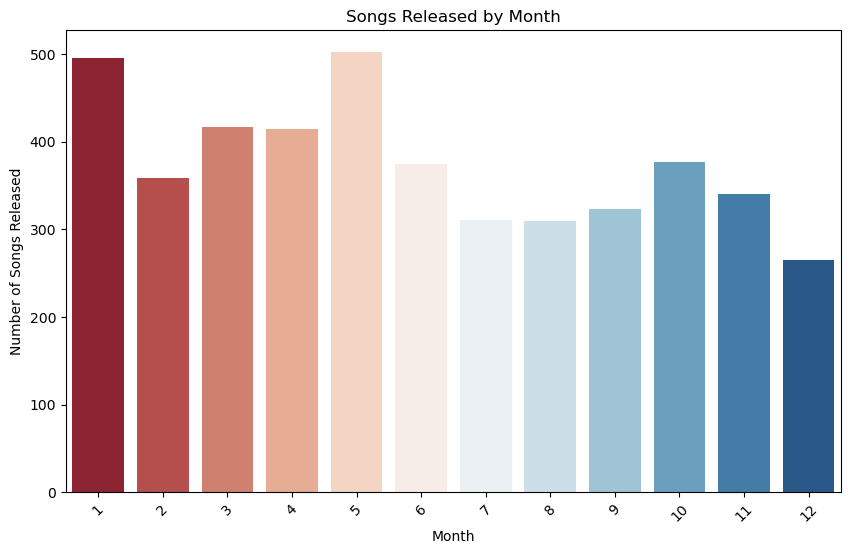

In [105]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

songs_by_year = df.groupby('year').size().reset_index(name='song_count')

songs_by_month = df.groupby('month').size().reset_index(name='song_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='song_count', data=songs_by_year, palette='Blues_d')
plt.title("Songs Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Songs Released")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='song_count', data=songs_by_month, palette='RdBu')
plt.title("Songs Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Songs Released")
plt.xticks(rotation=45)
plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

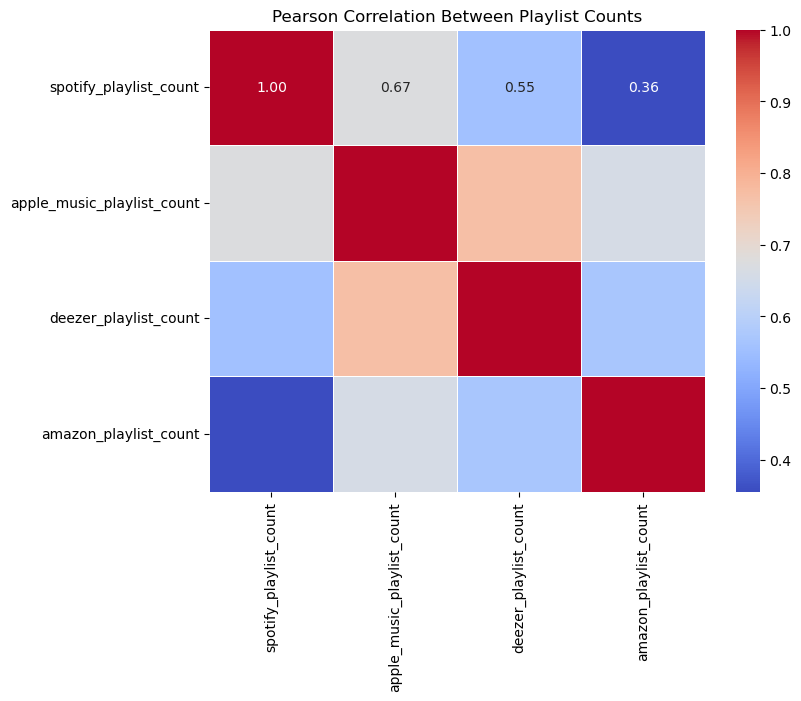

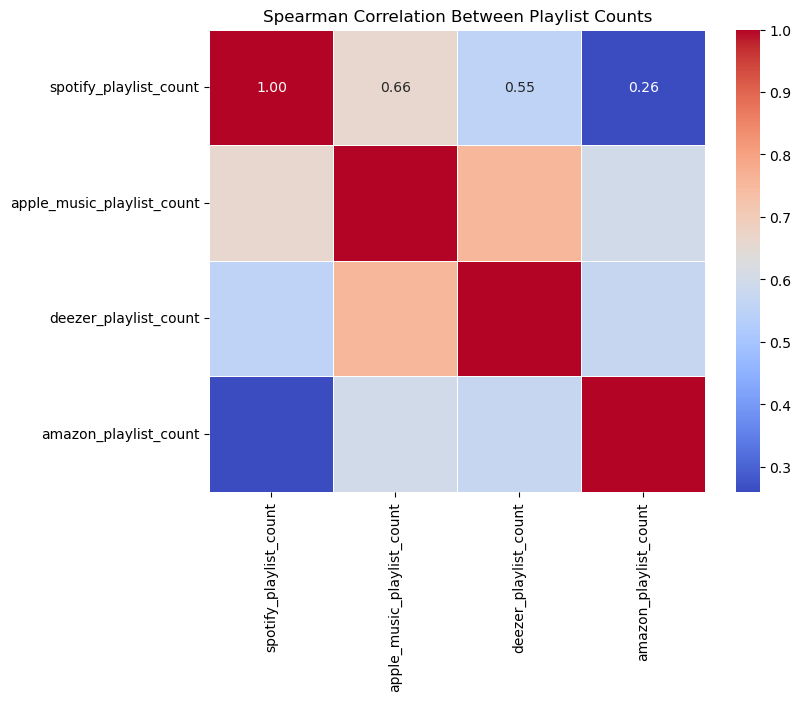

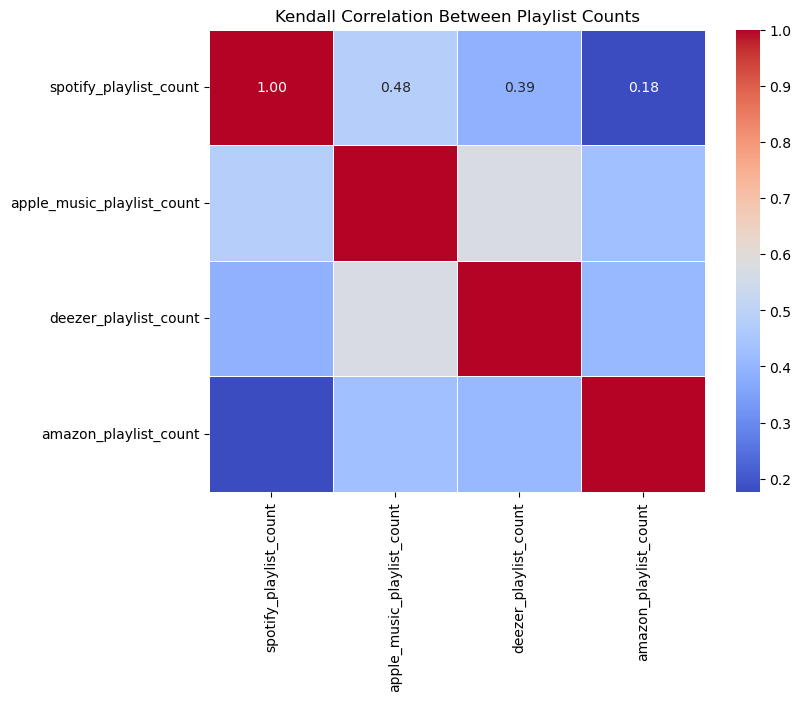

In [106]:
playlist_columns = ['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']

for column in playlist_columns:
    df[column] = df[column].astype(str).str.replace(',', '', regex=True)
    df[column] = pd.to_numeric(df[column], errors='coerce')

df_clean = df.dropna(subset=playlist_columns)

correlation_pearson = df_clean[playlist_columns].corr(method='pearson')
correlation_spearman = df_clean[playlist_columns].corr(method='spearman')
correlation_kendall = df_clean[playlist_columns].corr(method='kendall')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pearson Correlation Between Playlist Counts")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Correlation Between Playlist Counts")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_kendall, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Kendall Correlation Between Playlist Counts")
plt.show()

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

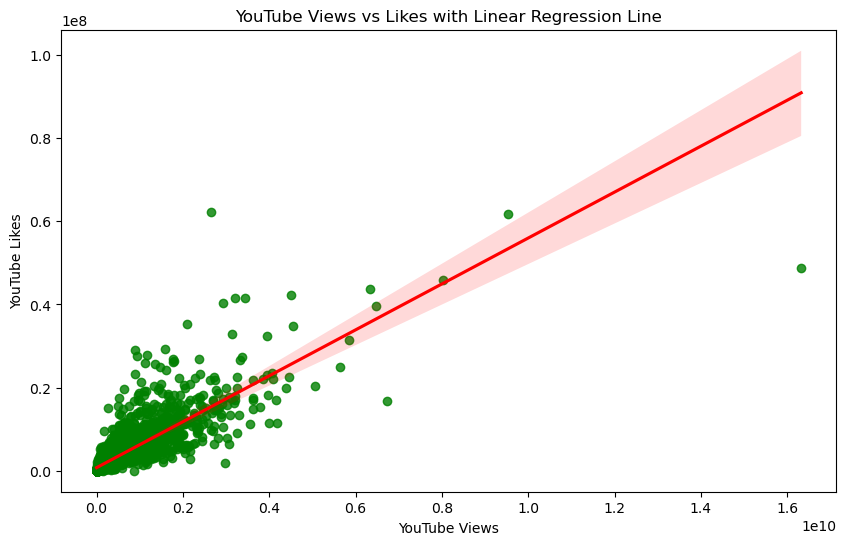

In [107]:
df['youtube_views'] = df['youtube_views'].astype(str).str.replace(',', '', regex=True)
df['youtube_likes'] = df['youtube_likes'].astype(str).str.replace(',', '', regex=True)
df['youtube_views'] = pd.to_numeric(df['youtube_views'], errors='coerce')
df['youtube_likes'] = pd.to_numeric(df['youtube_likes'], errors='coerce')

df_clean = df.dropna(subset=['youtube_views', 'youtube_likes'])

plt.figure(figsize=(10, 6))
sns.regplot(x='youtube_views', y='youtube_likes', data=df_clean, scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("YouTube Views vs Likes with Linear Regression Line")
plt.xlabel("YouTube Views")
plt.ylabel("YouTube Likes")
plt.show()

C:\Users\sergelen.n\AppData\Local\Temp\ipykernel_14000\1701804475.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['views_to_likes_ratio'] = df_clean['youtube_views'] / df_clean['youtube_likes']


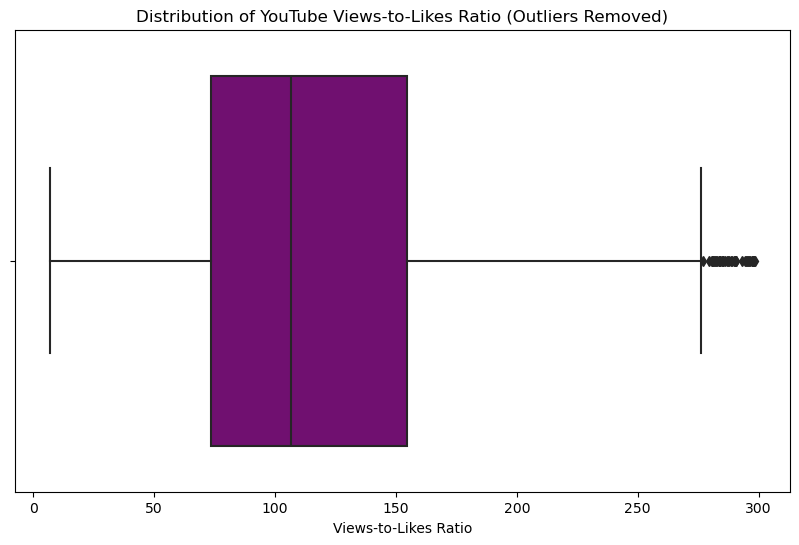

Mean YouTube Views-to-Likes Ratio (Outliers Removed): 118.60


In [108]:
df['youtube_views'] = df['youtube_views'].astype(str).str.replace(',', '', regex=True)
df['youtube_likes'] = df['youtube_likes'].astype(str).str.replace(',', '', regex=True)
df['youtube_views'] = pd.to_numeric(df['youtube_views'], errors='coerce')
df['youtube_likes'] = pd.to_numeric(df['youtube_likes'], errors='coerce')

df_clean = df.dropna(subset=['youtube_views', 'youtube_likes'])

df_clean['views_to_likes_ratio'] = df_clean['youtube_views'] / df_clean['youtube_likes']

Q1 = df_clean['views_to_likes_ratio'].quantile(0.25)
Q3 = df_clean['views_to_likes_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_clean[(df_clean['views_to_likes_ratio'] >= lower_bound) & (df_clean['views_to_likes_ratio'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['views_to_likes_ratio'], color='purple')
plt.title("Distribution of YouTube Views-to-Likes Ratio (Outliers Removed)")
plt.xlabel("Views-to-Likes Ratio")
plt.show()

mean_ratio = df_filtered['views_to_likes_ratio'].mean()
print(f"Mean YouTube Views-to-Likes Ratio (Outliers Removed): {mean_ratio:.2f}")

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

c:\Users\sergelen.n\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sergelen.n\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


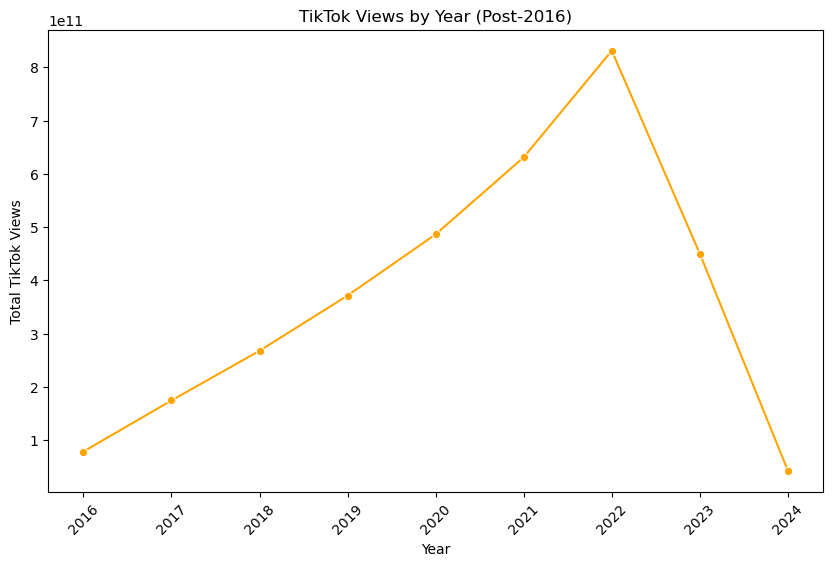

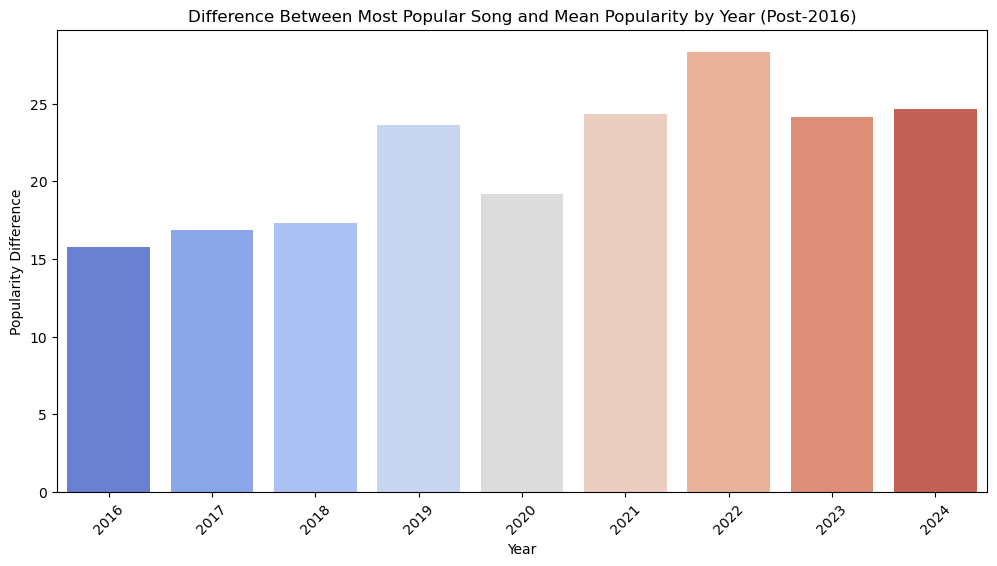

   release_year                                           track  \
0          2016                                         Starboy   
1          2017                See You Again (feat. Kali Uchis)   
2          2018                               Someone You Loved   
3          2019                                    Cruel Summer   
4          2020                                      Heat Waves   
5          2021  One Of The Girls (with JENNIE, Lily Rose Depp)   
6          2022                                End of Beginning   
7          2023                                          greedy   
8          2024                              A Bar Song (Tipsy)   

   spotify_popularity_most_popular  spotify_popularity_mean  \
0                             84.0                68.247863   
1                             84.0                67.151042   
2                             82.0                64.707424   
3                             88.0                64.371134   
4             

In [109]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # Convert release_date to datetime
df['tiktok_views'] = df['tiktok_views'].astype(str).str.replace(',', '', regex=True)
df['tiktok_views'] = pd.to_numeric(df['tiktok_views'], errors='coerce')

df['release_year'] = df['release_date'].dt.year

df_clean = df.dropna(subset=['release_year', 'tiktok_views'])

df_clean = df_clean[df_clean['release_year'] >= 2016]

tiktok_views_by_year = df_clean.groupby('release_year')['tiktok_views'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='tiktok_views', data=tiktok_views_by_year, marker='o', color='orange')
plt.title("TikTok Views by Year (Post-2016)")
plt.xlabel("Year")
plt.ylabel("Total TikTok Views")
plt.xticks(rotation=45)
plt.show()

df_clean['spotify_popularity'] = pd.to_numeric(df_clean['spotify_popularity'], errors='coerce')

most_popular_song_per_year = df_clean.loc[df_clean.groupby('release_year')['spotify_popularity'].idxmax()]

mean_popularity_per_year = df_clean.groupby('release_year')['spotify_popularity'].mean().reset_index()

popularity_comparison = most_popular_song_per_year[['release_year', 'track', 'spotify_popularity']].merge(mean_popularity_per_year, on='release_year', suffixes=('_most_popular', '_mean'))

popularity_comparison['popularity_difference'] = popularity_comparison['spotify_popularity_most_popular'] - popularity_comparison['spotify_popularity_mean']

plt.figure(figsize=(12, 6))
sns.barplot(x='release_year', y='popularity_difference', data=popularity_comparison, palette='coolwarm')
plt.title("Difference Between Most Popular Song and Mean Popularity by Year (Post-2016)")
plt.xlabel("Year")
plt.ylabel("Popularity Difference")
plt.xticks(rotation=45)
plt.show()

print(popularity_comparison[['release_year', 'track', 'spotify_popularity_most_popular', 'spotify_popularity_mean', 'popularity_difference']])

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 4487 entries, 0 to 4599
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   spotify_streams  4487 non-null   int64  
 1   youtube_views    4218 non-null   float64
 2   tiktok_views     3597 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 140.2 KB
None
Top 10 Songs by Custom Rank:
                          track                    artist  \
1024   Monkeys Spinning Monkeys             Kevin MacLeod   
1922                Love You So  The King Khan & BBQ Show   
474                       Oh No                    Kreepa   
1547                 Funny Song           Cavendish Music   
113                   Aesthetic                Tollan Kim   
26    STAY (with Justin Bieber)             The Kid LAROI   
3383                     Pieces          Danilo Stankovic   
255    love nwantiti (ah ah ah)                      CKay   
1145                   Infinity   

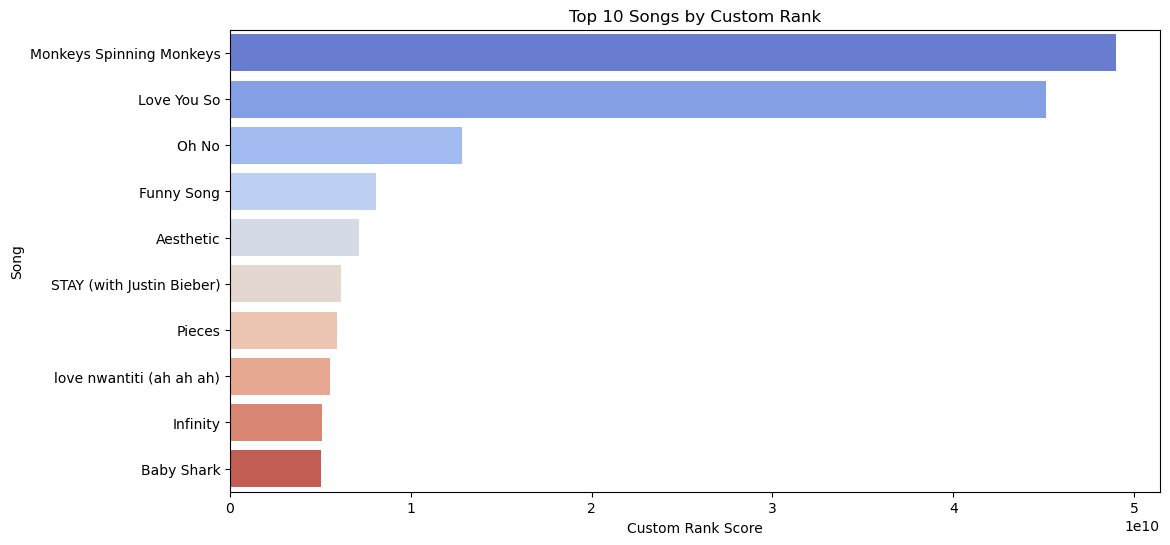

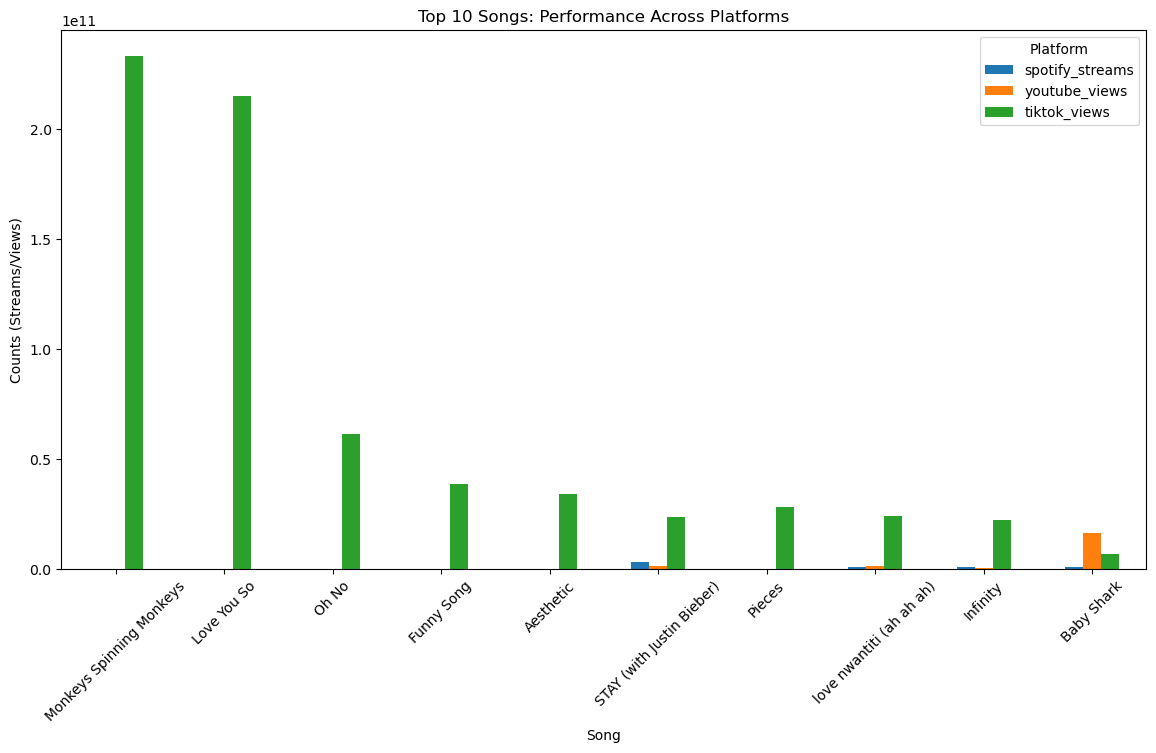

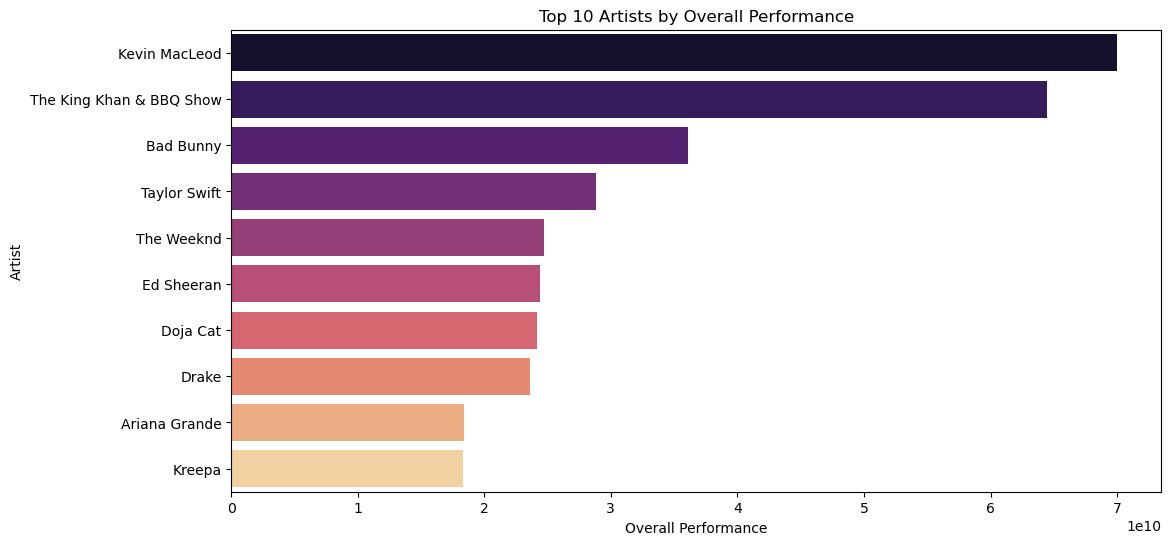

c:\Users\sergelen.n\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sergelen.n\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


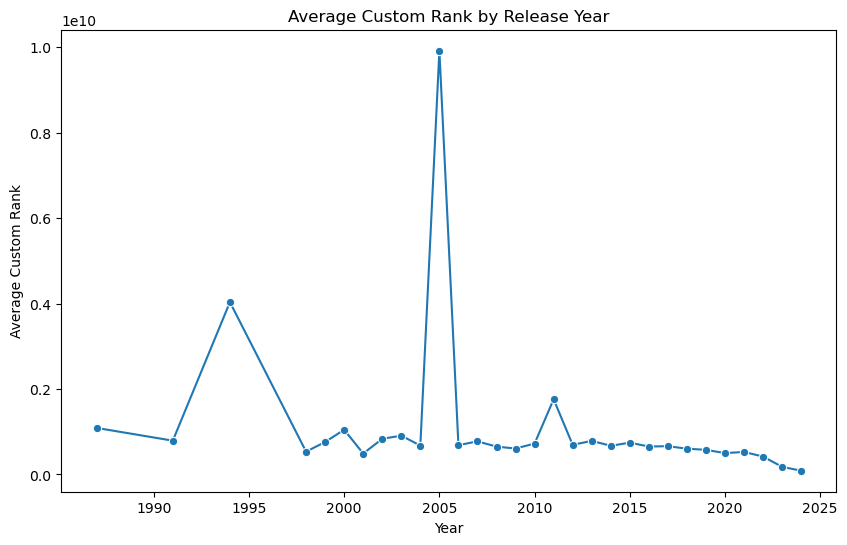

In [110]:
def clean_numeric_column(series):
    return pd.to_numeric(series.astype(str).str.replace(',', '', regex=True), errors='coerce')

cols_to_clean = ['spotify_streams', 'youtube_views', 'tiktok_views']

for col in cols_to_clean:
    df[col] = clean_numeric_column(df[col])

print(df[cols_to_clean].info())

df['overall_performance'] = (df['spotify_streams'] * 0.4) + (df['youtube_views'] * 0.3) + (df['tiktok_views'] * 0.3)

df['custom_rank'] = (df['overall_performance'] * 0.7) + (df['track_score'] * 0.3)

df_sorted = df.sort_values(by='custom_rank', ascending=False)
top_10_songs = df_sorted[['track', 'artist', 'album_name', 'custom_rank']]
print("Top 10 Songs by Custom Rank:")
print(top_10_songs.head(10))


plt.figure(figsize=(12,6))
sns.barplot(x='custom_rank', y='track', data=top_10_songs.head(10), palette='coolwarm')
plt.title("Top 10 Songs by Custom Rank")
plt.xlabel("Custom Rank Score")
plt.ylabel("Song")
plt.show()


top_10_platform = df_sorted[['track', 'spotify_streams', 'youtube_views', 'tiktok_views']].head(10)
top_10_platform.set_index('track').plot(kind='bar', figsize=(14,7))
plt.title("Top 10 Songs: Performance Across Platforms")
plt.xlabel("Song")
plt.ylabel("Counts (Streams/Views)")
plt.xticks(rotation=45)
plt.legend(title="Platform")
plt.show()

artist_performance = df.groupby('artist').agg({
    'spotify_streams': 'sum',
    'youtube_views': 'sum',
    'tiktok_views': 'sum'
}).reset_index()

artist_performance['overall_performance'] = (artist_performance['spotify_streams'] * 0.4 +
                                             artist_performance['youtube_views'] * 0.3 +
                                             artist_performance['tiktok_views'] * 0.3)

top_artists = artist_performance.sort_values(by='overall_performance', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='overall_performance', y='artist', data=top_artists, palette='magma')
plt.title("Top 10 Artists by Overall Performance")
plt.xlabel("Overall Performance")
plt.ylabel("Artist")
plt.show()


df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

yearly_rank = df.groupby('release_year')['custom_rank'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='custom_rank', data=yearly_rank, marker='o')
plt.title("Average Custom Rank by Release Year")
plt.xlabel("Year")
plt.ylabel("Average Custom Rank")
plt.show()